# Forest Cover Type Prediction

## UCB MIDS w207: Introduction to Machine Learning

### Final Project

### Proposal Date: July 6, 2020

### Project:  Seeing the Trees Through the Forest

### Team Members: Lesley Matheson and Brian Ament

## Summary of Problem:

In this study the objective is to predict the forest cover type (the predominant kind of tree cover) predict the forest cover type from strictly cartographic variables (as opposed to remotely sensed data). The data provided includes information about soil types, proximity to hazards such as fires, highways, and access to water.  Based on features designed from the data model developed will predict the canopy type.  There are seven different canopy types.  The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type.

One potential motivation for the study is to better understand how effective cartographic features can be as opposed to imagery and sensoery data.  Another motivation is to study the relationships of econlogical factors on canopy type in geographic regions that have been relatively untouched by human processes

## Step 1: Inference

x ---> $\hat{Y}$ = $\hat{f}$ (x,$\theta$)

As mentioned above, the model takes data points x, here a 55 feature space and outputs a classification of the data, here a prediction of the canopy type. 


## Step 2: Data


The data in the dataset is provided by US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type. This training data set contains actual output values so that supervised learning models can be trained on these realy output values.

- Training data
    - 15120 observations
    - contains both features and the Cover_Type
- Test data
    - 565892 observations
    - set contains only the features


Data source: https://www.kaggle.com/c/forest-cover-type-prediction/data

Several issues to be considered in the data include feature engineering, some of the features are in binary format, others are values in floating point.  The features themselves may be correlated. The data does not need to be rebalanced or cleaned to any large extent, but may need to be rescaled.   


#### Classifications 

The output of the model will be one of the 7 classes provided in the training data.  These classifications, our predicted Y values, are canopy types.  They are listed below folllowed by an image of the Lodgepole Pine.  IN the data set the predicted class, the labels, are a variable Cover_Type.

- 1 Spruce/Fir
- 2 Lodgepole Pine
- 3 Ponderosa Pine
- 4 Cottonwood/Willow
- 5 Aspen
- 6 Douglas-fir
- 7 Krummholz

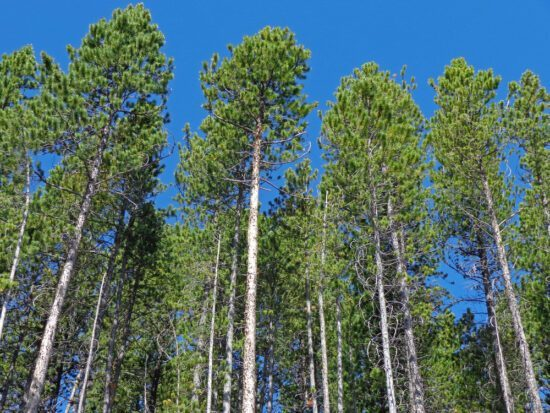

In [21]:
from IPython.display import Image
Image("Lodgepole_Pine.jpeg")

#### Features: X values

- Elevation - Elevation in meters
- Aspect - Aspect in degrees azimuth
- Slope - Slope in degrees
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation



#### Wilderness areas

- 1 Rawah Wilderness Area
- 2 Neota Wilderness Area
- 3 Comanche Peak Wilderness Area
- 4 Cache la Poudre Wilderness Area

#### Soil types

- 1 Cathedral family - Rock outcrop complex, extremely stony.
- 2 Vanet - Ratake families complex, very stony.
- 3 Haploborolis - Rock outcrop complex, rubbly.
- 4 Ratake family - Rock outcrop complex, rubbly.
- 5 Vanet family - Rock outcrop complex complex, rubbly.
- 6 Vanet - Wetmore families - Rock outcrop complex, stony.
- 7 Gothic family.
- 8 Supervisor - Limber families complex.
- 9 Troutville family, very stony.
- 10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
- 11 Bullwark - Catamount families - Rock land complex, rubbly.
- 12 Legault family - Rock land complex, stony.
- 13 Catamount family - Rock land - Bullwark family complex, rubbly.
- 14 Pachic Argiborolis - Aquolis complex.
- 15 unspecified in the USFS Soil and ELU Survey.
- 16 Cryaquolis - Cryoborolis complex.
- 17 Gateview family - Cryaquolis complex.
- 18 Rogert family, very stony.
- 19 Typic Cryaquolis - Borohemists complex.
- 20 Typic Cryaquepts - Typic Cryaquolls complex.
- 21 Typic Cryaquolls - Leighcan family, till substratum complex.
- 22 Leighcan family, till substratum, extremely bouldery.
- 23 Leighcan family, till substratum - Typic Cryaquolls complex.
- 24 Leighcan family, extremely stony.
- 25 Leighcan family, warm, extremely stony.
- 26 Granile - Catamount families complex, very stony.
- 27 Leighcan family, warm - Rock outcrop complex, extremely stony.
- 28 Leighcan family - Rock outcrop complex, extremely stony.
- 29 Como - Legault families complex, extremely stony.
- 30 Como family - Rock land - Legault family complex, extremely stony.
- 31 Leighcan - Catamount families complex, extremely stony.
- 32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
- 33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
- 34 Cryorthents - Rock land complex, extremely stony.
- 35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
- 36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
- 37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
- 38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
- 39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
- 40 Moran family - Cryorthents - Rock land complex, extremely stony.

## Step 3: Feature selection

Find the "best" representation of X


## Step 4: Train model
### Fit

The goal is to use the training data to optimize the parameters, the test data to optimize the hyperparameters for various potential models. Here the notation for the various models implemented follows the format below.

- model: e.g., multiple regression $\hat{Y}_{i}$ = $b_{0}$ + $b_{1}x_{1i}$ + $b_{2}x_{2i}$ + ...+ $b_{k}x_{ki}$
- parameters: $b_{k}$
- cost function: J($b_{k}$)
- objective: $min_{b_{k}}$ J($b_{k}$)

### Test
The goal is to use test data to tune hyperparameters and avoid over- or under-fitting the model.


### Evaluate Alternative Model Choices
Potential models to be explored for best model precision on the test data set include the following.

 - Logistic Regression 
 - Linear Discriminant Analysis
 - K Nearest Neighbors
 - Gaussian Naive Bayes
 - Decision Tree Classifiers
     - Including Random ForesY
 - Support Vector Machines

### Performance Tuning
- Feature scaling
- Learning rate/execution rates trade offs
- Feature engineering: ideas include:
    - Binning the data for binarization
    - Interaction variables
    - Explore independence amoung features
- Model Improvements
    - Bagging
    - Boosting

## Basic Data Exploration:


In [10]:
# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from pandas import DataFrame, read_csv

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import os


In [14]:
file = r'train.csv'
df = pd.read_csv(file)
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [37]:
print("The data contains {0:3d} observations and {1:2} features.".format(df.shape[0], df.shape[1]-2))
max_el=df['Elevation'].max()
print("The maximum elevation is {0:4d} feet.".format(df['Elevation'].max()))
print("The minimum elevation is {0:4d} feet.".format(df['Elevation'].min()))

The data contains 15120 observations and 54 features.
The maximum elevation is 3849 feet.
The minimum elevation is 1863 feet.


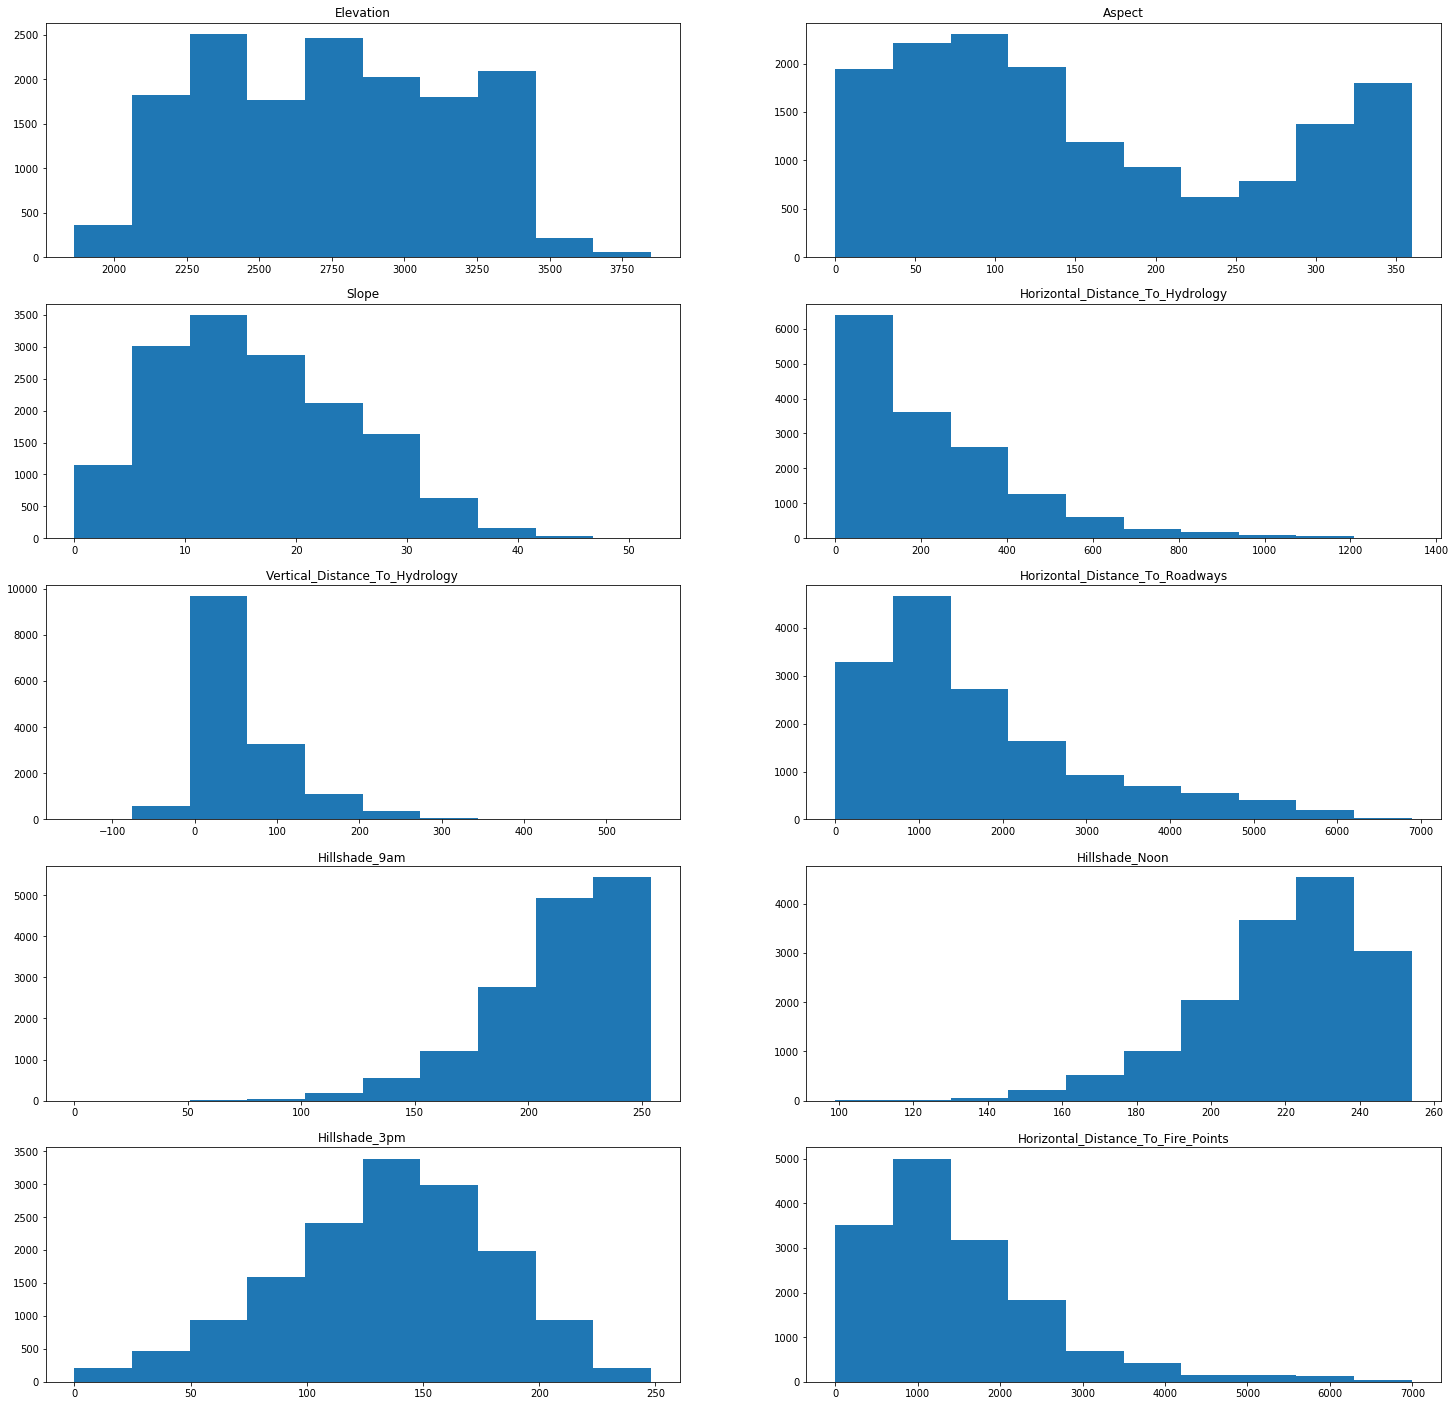

In [22]:
fig, ax = plt.subplots(5, 2, figsize=(25,25))
ax[0,0].hist(df.Elevation)
ax[0,1].hist(df.Aspect)
ax[1,0].hist(df.Slope)
ax[1,1].hist(df.Horizontal_Distance_To_Hydrology)
ax[2,0].hist(df.Vertical_Distance_To_Hydrology)
ax[2,1].hist(df.Horizontal_Distance_To_Roadways)
ax[3,0].hist(df.Hillshade_9am)
ax[3,1].hist(df.Hillshade_Noon)
ax[4,0].hist(df.Hillshade_3pm)
ax[4,1].hist(df.Horizontal_Distance_To_Fire_Points)

ax[0,0].title.set_text('Elevation')
ax[0,1].title.set_text('Aspect')
ax[1,0].title.set_text('Slope')
ax[1,1].title.set_text('Horizontal_Distance_To_Hydrology')
ax[2,0].title.set_text('Vertical_Distance_To_Hydrology')
ax[2,1].title.set_text('Horizontal_Distance_To_Roadways')
ax[3,0].title.set_text('Hillshade_9am')
ax[3,1].title.set_text('Hillshade_Noon')
ax[4,0].title.set_text('Hillshade_3pm')
ax[4,1].title.set_text('Horizontal_Distance_To_Fire_Points')